# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [45]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [46]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,K20_c021_a1_FIA,103.105858,0.006621,1286.162187,0.006184,239.232472,1286.162187,304.322899,0.518352,1.960249,...,1.068627,0.058943,0.004333,1.123333,1.115183,0.113396,0.002401,PseudoVoigtModel,PseudoVoigtModel,No
1,K20_c025_a1_FIA_r1,103.329587,0.013635,1285.651000,0.012323,243.831022,1285.651000,406.288241,0.626470,3.791844,...,1.068273,0.110452,0.005139,1.119718,1.168394,0.119513,0.002204,PseudoVoigtModel,PseudoVoigtModel,No
2,K20_c025_a1_FIA_r2_CRR_DiadFit,103.302078,0.066231,1285.656286,0.066101,246.994356,1285.656286,434.321420,0.625963,11.750023,...,1.233929,0.229660,0.005069,1.160714,1.213720,0.158185,0.002019,PseudoVoigtModel,PseudoVoigtModel,No
3,K20_c025_a1_FIA_r3_CRR_DiadFit,103.295360,0.008615,1285.654385,0.007930,261.431335,1285.654385,420.452506,0.583743,2.752321,...,1.051975,0.131698,0.004466,1.157534,1.167513,0.161063,0.002151,PseudoVoigtModel,PseudoVoigtModel,No
4,K20_c026_a1_FIA_r1,103.286722,0.015151,1285.722580,0.013561,108.612042,1285.722580,173.129695,0.618082,1.769585,...,1.056680,0.043083,0.011381,1.066202,1.083544,0.066089,0.004767,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [47]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series','broad'],
 sort=True)
diad_meta[0]

'04 FG04-A1-4-start_r1.txt'

## Now get all the important information out of the metadata files

In [48]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 58/58 [00:00<00:00, 1771.44it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-start_r1.txt,"January 13, 2025\n",January,13.0,6.044,45.0,5.0,50.0,"['0h', '3m', '46s']",11:10:44 AM\n,40244.0,1324.964
1,FG04-A1-4-start_r2.txt,"January 13, 2025\n",January,13.0,6.098,45.0,5.0,50.0,"['0h', '3m', '46s']",11:16:48 AM\n,40608.0,1324.964
2,FG04-A1-4-start_r3.txt,"January 13, 2025\n",January,13.0,6.136,45.0,5.0,50.0,"['0h', '3m', '46s']",11:20:48 AM\n,40848.0,1324.964
3,K20_c021_a1_FIA.txt,"January 13, 2025\n",January,13.0,9.972,60.0,4.0,50.0,"['0h', '4m', '1s']",11:46:12 AM\n,42372.0,1324.964
4,K20_c024_a1_FIA_r1.txt,"January 13, 2025\n",January,13.0,14.953,60.0,4.0,50.0,"['0h', '4m', '1s']",12:05:34 PM\n,43534.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [49]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-start_r1'

In [50]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-start_r1', 'FG04-A1-4-start_r2', 'FG04-A1-4-start_r3',
       'K20_c021_a1_FIA', 'K20_c024_a1_FIA_r1', 'K20_c024_a1_FIA_r2',
       'K20_c024_a1_FIA_r3', 'K20_c025_a1_FIA_r1', 'K20_c025_a1_FIA_r2',
       'K20_c025_a1_FIA_r3', 'K20_c026_a1_FIA_r1', 'K20_c026_a1_FIA_r2',
       'K20_c026_a1_FIA_r3', 'K20_c026_a2_FIB_r1', 'K20_c026_a2_FIB_r2',
       'K20_c026_a2_FIB_r3', 'K20_c027_a1_FIA_r1', 'K20_c028_a1_FIA',
       'FG04-A1-4-end_r4', 'FG04-A1-4-end_r5', 'FG04-A1-4-end_r6'],
      dtype=object)

## Now get filename from spectra into same form as metadata

In [51]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
K20_c021_a1_FIA


In [52]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['K20_c021_a1_FIA', 'K20_c025_a1_FIA_r1', 'K20_c025_a1_FIA_r2',
       'K20_c025_a1_FIA_r3', 'K20_c026_a1_FIA_r1', 'K20_c026_a1_FIA_r2',
       'K20_c026_a1_FIA_r3', 'K20_c026_a2_FIB_r1', 'K20_c026_a2_FIB_r2',
       'K20_c026_a2_FIB_r3', 'K20_c024_a1_FIA_r1', 'K20_c024_a1_FIA_r2',
       'K20_c024_a1_FIA_r3', 'K20_c027_a1_FIA_r1', 'K20_c028_a1_FIA',
       'FG04-A1-4-start_r1', 'FG04-A1-4-start_r2', 'FG04-A1-4-start_r3',
       'FG04-A1-4-end_r4', 'FG04-A1-4-end_r5', 'FG04-A1-4-end_r6'],
      dtype='<U18')

In [53]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K20_c021_a1_FIA,103.105858,0.006621,1286.162187,0.006184,239.232472,1286.162187,304.322899,0.518352,1.960249,...,January,13.0,9.972,60.0,4.0,50.0,"['0h', '4m', '1s']",11:46:12 AM\n,42372.0,1324.964
1,K20_c025_a1_FIA_r1,103.329587,0.013635,1285.651000,0.012323,243.831022,1285.651000,406.288241,0.626470,3.791844,...,January,13.0,10.013,60.0,4.0,50.0,"['0h', '4m', '1s']",1:00:15 PM\n,46815.0,1324.964
2,K20_c025_a1_FIA_r2,103.302078,0.066231,1285.656286,0.066101,246.994356,1285.656286,434.321420,0.625963,11.750023,...,January,13.0,10.036,60.0,4.0,50.0,"['0h', '4m', '1s']",1:11:03 PM\n,47463.0,1324.964
3,K20_c025_a1_FIA_r3,103.295360,0.008615,1285.654385,0.007930,261.431335,1285.654385,420.452506,0.583743,2.752321,...,January,13.0,10.013,60.0,4.0,50.0,"['0h', '4m', '1s']",1:15:42 PM\n,47742.0,1324.964
4,K20_c026_a1_FIA_r1,103.286722,0.015151,1285.722580,0.013561,108.612042,1285.722580,173.129695,0.618082,1.769585,...,January,13.0,9.921,60.0,4.0,50.0,"['0h', '4m', '2s']",1:31:03 PM\n,48663.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [54]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [55]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [56]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.303780636390017e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K20_c021_a1_FIA,0.050869,0.004650,0.002630,0.003836,102.878635,0.006636,0.000627,0.006621,9.972,...,1151.267044,194.515925,106.689682,Spline,0.266294,0.103186,42372.0,0.997796,0.997790,0.997802
1,K20_c025_a1_FIA_r1,0.139083,0.006640,0.005397,0.003869,103.101263,0.013620,0.000629,0.013635,10.013,...,1151.095859,77.175757,51.206405,Spline,0.077480,0.032393,46815.0,0.997790,0.997784,0.997796
2,K20_c025_a1_FIA_r2,0.128172,0.026467,0.026186,0.003843,103.073727,0.066087,0.000633,0.066231,10.036,...,1150.998039,78.173379,51.765958,Spline,0.072386,0.030328,47463.0,0.997789,0.997783,0.997796
3,K20_c025_a1_FIA_r3,0.125501,0.005137,0.003416,0.003838,103.066985,0.008620,0.000635,0.008615,10.013,...,1150.949129,87.868665,50.853747,Spline,0.084114,0.035069,47742.0,0.997789,0.997783,0.997795
4,K20_c026_a1_FIA_r1,0.122036,0.007115,0.005996,0.003831,103.058240,0.015131,0.000643,0.015151,9.921,...,NaN,NaN,NaN,NaN,NaN,NaN,48663.0,0.997788,0.997782,0.997794


In [57]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

6.303780636390017e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K20_c021_a1_FIA,0.050869,0.004650,0.002630,0.003836,102.878635,0.006636,0.000627,0.006621,9.972,...,1151.267044,194.515925,106.689682,Spline,0.266294,0.103186,42372.0,0.997796,0.997790,0.997802
1,K20_c025_a1_FIA_r1,0.139083,0.006640,0.005397,0.003869,103.101263,0.013620,0.000629,0.013635,10.013,...,1151.095859,77.175757,51.206405,Spline,0.077480,0.032393,46815.0,0.997790,0.997784,0.997796
2,K20_c025_a1_FIA_r2,0.128172,0.026467,0.026186,0.003843,103.073727,0.066087,0.000633,0.066231,10.036,...,1150.998039,78.173379,51.765958,Spline,0.072386,0.030328,47463.0,0.997789,0.997783,0.997796
3,K20_c025_a1_FIA_r3,0.125501,0.005137,0.003416,0.003838,103.066985,0.008620,0.000635,0.008615,10.013,...,1150.949129,87.868665,50.853747,Spline,0.084114,0.035069,47742.0,0.997789,0.997783,0.997795
4,K20_c026_a1_FIA_r1,0.122036,0.007115,0.005996,0.003831,103.058240,0.015131,0.000643,0.015151,9.921,...,NaN,NaN,NaN,NaN,NaN,NaN,48663.0,0.997788,0.997782,0.997794


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [58]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
# sorted_df=sorted_df[~(sorted_df['Corrected_Splitting']>106)]
sorted_df.to_excel(name)

Raman_session_January 13, 2025_fitted_2025-01-13.xlsx


## This helps visualize the errors on each spectra 

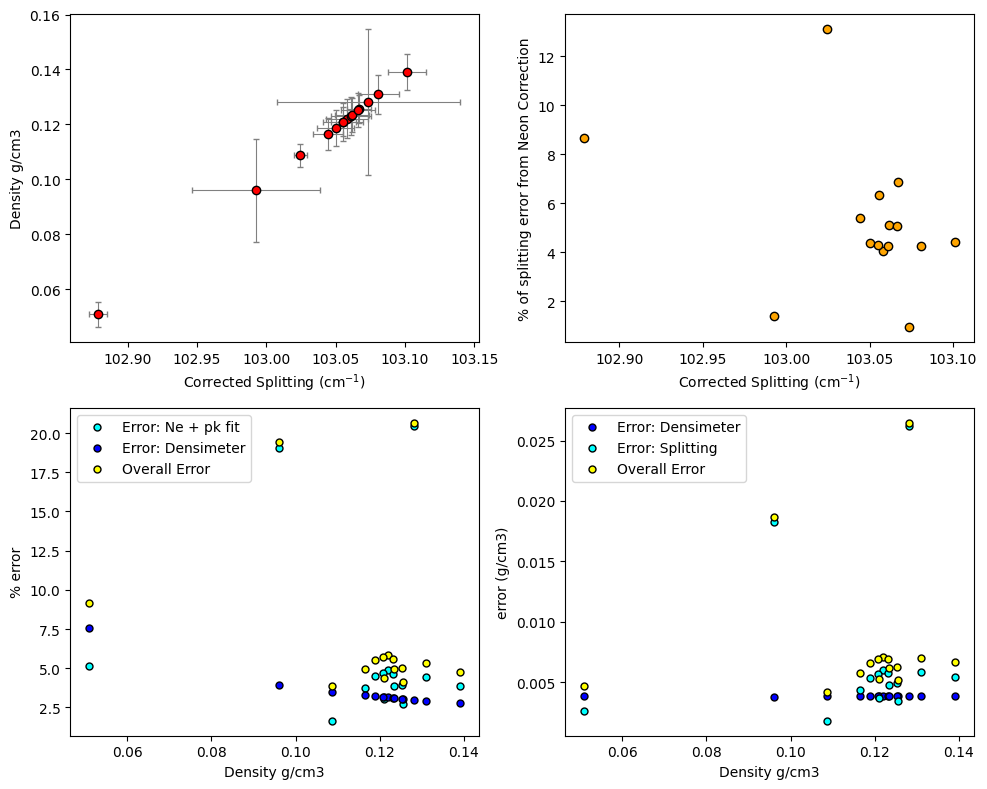

In [59]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

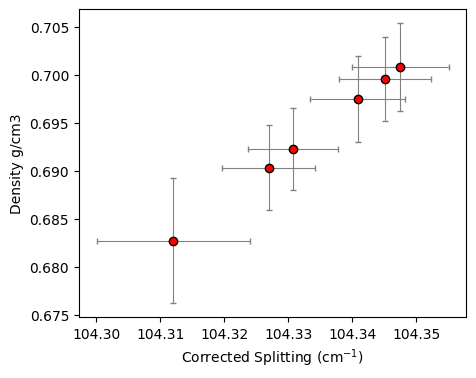

In [60]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [61]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
15,FG04-A1-4-start_r1,0.692237,0.004287,0.003558,0.002391,104.330725,0.006977,0.000653,0.006962,6.044,...,NaN,NaN,NaN,NaN,NaN,NaN,40244.0,0.997799,0.997793,0.997805
16,FG04-A1-4-start_r2,0.690309,0.004417,0.003714,0.002391,104.326942,0.007290,0.000649,0.007278,6.098,...,NaN,NaN,NaN,NaN,NaN,NaN,40608.0,0.997799,0.997792,0.997805
17,FG04-A1-4-start_r3,0.697424,0.004488,0.003797,0.002393,104.340885,0.007427,0.000647,0.007415,6.136,...,NaN,NaN,NaN,NaN,NaN,NaN,40848.0,0.997798,0.997792,0.997804
18,FG04-A1-4-end_r4,0.682715,0.006517,0.006064,0.002389,104.312006,0.011949,0.000707,0.011954,6.002,...,NaN,NaN,NaN,NaN,NaN,NaN,52638.0,0.997783,0.997776,0.997789
19,FG04-A1-4-end_r5,0.699575,0.004394,0.003685,0.002393,104.345089,0.007200,0.000712,0.007181,5.996,...,NaN,NaN,NaN,NaN,NaN,NaN,52885.0,0.997782,0.997775,0.997789
20,FG04-A1-4-end_r6,0.700817,0.004553,0.003873,0.002393,104.347516,0.007563,0.000717,0.007545,6.014,...,NaN,NaN,NaN,NaN,NaN,NaN,53151.0,0.997782,0.997775,0.997789


In [62]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

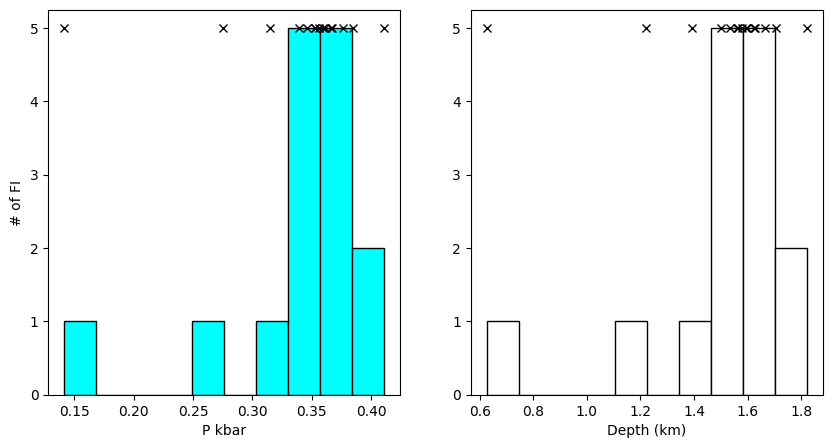

In [63]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [64]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()